In [145]:
import pandas as pd
from datetime import datetime as dt
from datetime import timedelta

Load

In [146]:
current_date = '2023-07-15'
data_type = 'Temperature'

In [147]:
raw_data = pd.read_csv(f'zuraach_ail/{data_type}_data.csv')
datetime_data = []
temp_data = []
for i, item in enumerate(raw_data['Datetime']):
    date_str = item.split(' ')[0]
    if date_str == current_date:
        datetime_data.append(item)
        temp_data.append(raw_data[data_type][i])

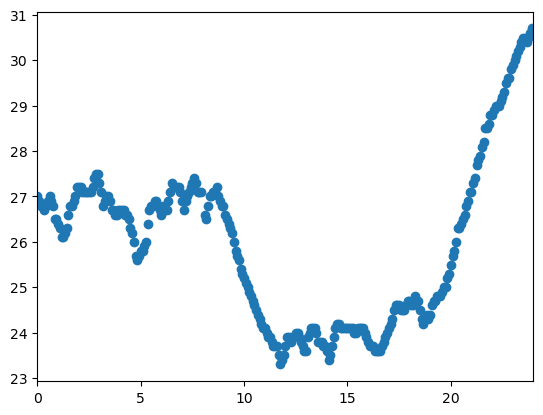

In [148]:
import matplotlib.pyplot as plt
x_data = [float(item.split(' ')[1].split(':')[0]) + float(item.split(' ')[1].split(':')[1])/60 for item in datetime_data]
plt.axis([0, 24, None, None])
plt.scatter(x_data, temp_data)

Interpolation

In [149]:
# count_sum = 0
# last = dt.fromisoformat(datetime_data[0])
# for i, item in enumerate(datetime_data[1:]):
#     date = dt.fromisoformat(item)
#     diff = date.timestamp() - last.timestamp()
#     if diff > 600:
#         count = round(diff/300 - 1)
#         last_temp = temp_data[i+count_sum]
#         current_temp = temp_data[i+1+count_sum]
#         temp_diff = (current_temp - last_temp) / count
#         date_now = dt.fromisoformat(last.strftime("%Y-%m-%d %H:%M:%S"))
#         for j in range(count):
#             date_now += timedelta(minutes=5)
#             last_temp += temp_diff
#             temp_data.insert(i+1+count_sum+j, last_temp)
#             datetime_data.insert(i+1+count_sum+j, date_now.strftime("%Y-%m-%d %H:%M:%S"))
#         count_sum += count
#         print(i+1, count, last, date, current_temp)
#     last = date

Zero fill

In [150]:
# count_sum = 0
# last = dt.fromisoformat(datetime_data[0])
# for i, item in enumerate(datetime_data[1:]):
#     date = dt.fromisoformat(item)
#     diff = date.timestamp() - last.timestamp()
#     if diff > 600:
#         count = round(diff/300 - 1)
#         date_now = dt.fromisoformat(last.strftime("%Y-%m-%d %H:%M:%S"))
#         for j in range(count):
#             date_now += timedelta(minutes=5)
#             temp_data.insert(i+1+count_sum+j, 0)
#             datetime_data.insert(i+1+count_sum+j, date_now.strftime("%Y-%m-%d %H:%M:%S"))
#         count_sum += count
#     last = date

Validate

In [151]:
last = dt.fromisoformat(datetime_data[0])
for item in datetime_data[1:]:
    date = dt.fromisoformat(item)
    diff = date.timestamp() - last.timestamp()
    if diff > 600:
        print(diff)
        print(last, date)
    last = date
print(len(datetime_data))
print(len(temp_data))

287
287


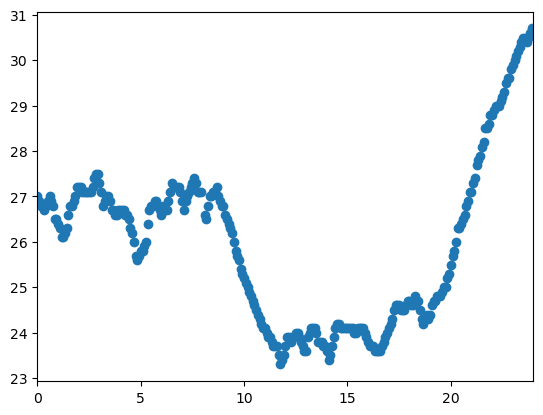

In [152]:
x_data = [float(item.split(' ')[1].split(':')[0]) + float(item.split(' ')[1].split(':')[1])/60 for item in datetime_data]
plt.axis([0, 24, None, None])
plt.scatter(x_data, temp_data)

Save

In [153]:
import csv

with open(f'zuraach_ail/{data_type}_{current_date}_raw.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows([[d, round(t, 1)] for d, t in list(zip(datetime_data, temp_data))])
